<a href="https://colab.research.google.com/github/Lvl1Programmer/Outlooker/blob/main/FinanceNewsWithLLama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FinReader

Inspired by:
https://github.com/AI4Finance-Foundation/FinGPT?tab=readme-ov-file

I will be recreating or try to create my own version of FinGPT with a newer model of Llama, Llama 3 with LoRa for the tasks of simply sentiment analysis. Although i will be mainly focusing on news or finanical text focusing on crypto to further increase relibility and robustness of the model.

#Disclaimer
The predictions and outputs generated by this Large Language Model (LLM) are intended solely for informational purposes. The model relies on historical data, patterns, and algorithms, which may not accurately reflect real-world events, market movements, or outcomes.

## Important:

- **No Warranty**: While efforts are made to ensure the accuracy of predictions, I do not guarantee the correctness, completeness, or reliability of any information provided. The outputs are generated based on the model's training data and may not consider recent or rapidly changing events.
- **Non-Financial or Legal Advice**: The predictions generated are not financial, legal, or investment advice. Users should consult with professional advisors or conduct their own research before making any decisions based on the generated outputs.
- **User Responsibility**: Any actions taken or decisions made based on the model's outputs are the sole responsibility of the user. I am not liable for any losses, damages, or adverse outcomes arising from the use of this LLM's predictions.
- **No Liability**: By using this LLM, you acknowledge and agree that I, as the developer, am not responsible for any direct, indirect, incidental, or consequential damages resulting from your reliance on the model's outputs.
Use the model's predictions at your own risk.

## Table of Contents
1. [Goal of this notebook](#Goal_of_this_notebook)
2. [Datasets](#Datasets)
3. [Model Development](#Model_Development)
4. [Model Deployment](#Model_Deployment)

## Goal of this notebook
Here we will focus on more on how the tools to acuqire the datasets and the model developmeent.

## Datasets
1. Twitter Dataset
  - Consist of two dataset:
    - Twitter Financial News Sentiment Dataset
    - Live Feed (Based on [Top 10 Crypto Twitter Influencers You Need to Follow in 2024 by Paul Lipen](https://ninjapromo.io/top-crypto-twitter-influencers))
2. Crypto Compare Dataset

Note: For live feed since we don't have label we will be using Vader to label them first before putting it through our Lllama3 Model. But for the simplicity of this notebook we will focus on the two dataset. For a more fine-tuned model will be available

### VADER

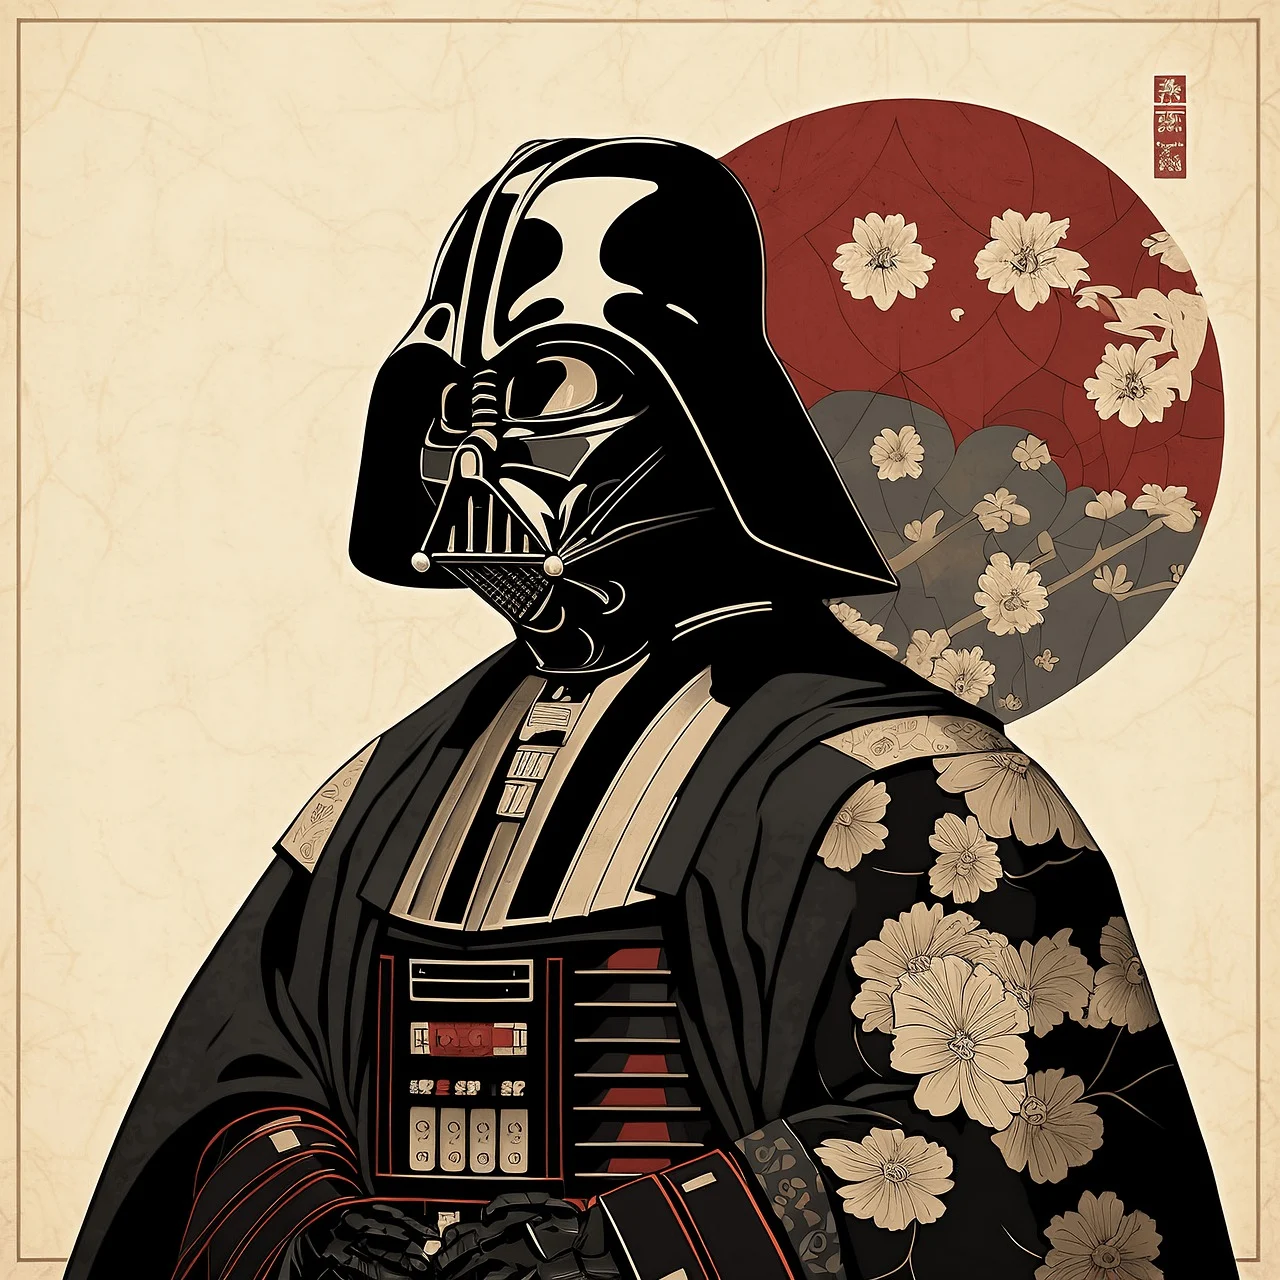

Image Reference:

> "AI-generated Darth Vader, Star Wars" by Pixabay, available [here](https://pixabay.com/illustrations/ai-generated-darth-vader-star-wars-7877747/), under the Pixabay License. The content is licensed by Pixabay and allows free use for commercial and non-commercial purposes without the need for attribution.




Before going into the datasets, since we are using an unlabeled dataset. Our first course of action will obviously be labeling them. Now to label, them we will be using the help of VADER. So, to see the robustness and validity of the dataset we first need to explore VADER.

P.S don't confuse VADER for darth vader from start wars

#### **What is VADER**
Available through the nltk library, **Valence Aware Dictionary and sEntiment Reasoner** is a rule-based sentiment analysis tool designed specifically for social media test. Known for being lightweight, fast, and effective in detecting short informal text and headlines.

#### **How it works**
1. Lexicon-Based Approach
  - Uses sentiment lexicon(predefined list of words and phrases taht are asociated with sentiment score with each lexicon has a polarity score(-1 to 1, -1 as negative, +1 as negative, 0 neutral)
2. Polarity Scoring Mechanism
  - As said before VADER uses polarity scoring, it assigns socres to each words and then aggregates them to produce compound score.
3. Intensifiers and Modifiers
  - These are words taht amplify the sentiment, such as "very" and "extremly"
  - While Dampers/Modifiers reduces sentiment's intesity, such as "slightly" or "a bit"
4. Handling Negations
  - VADER are equipped to recognize negation words like "not" and "never"
5. Special Handling of Punctuation and Capitalization
  - VADER increase sentiment intensity when ! are present
  - Capitalization when all caps, they are treated as having stronger sentiment.
6. Emoji and Slang recognition
  - VADER support common emojis and slang that represent sentiment like 😊 or 😢 or "LOL" or "OMG"

#### Ad-Hoc Robustness Considerations
Robust whenever:
1. Use on analyzing short text
2. Intrepeting sentiment shifts when a single word change
3. Handling empahisis with caps, punctuation and emojis.

#### Steps forward
1. Customize Lexicon: add crypto specific terms like HODL, FOMO, whale (This will be added with the app later, for now we will use the default VADER)
2. Combine with Contextual Model(Will be implemented in the app later)
3. For real-time inference


#### **References:**
1. [VADER sentiment analysi by Izzy Miller](https://hex.tech/templates/sentiment-analysis/vader-sentiment-analysis/#:~:text=Understanding%20VADER&text=This%20lexicon%20comprises%20various%20words,it%20is%20positive%20or%20negative.)
2. [VADER in nltk library](https://www.nltk.org/_modules/nltk/sentiment/vader.html)
3. [VADER documentation in nltk](https://www.nltk.org/api/nltk.sentiment.vader.html#nltk.sentiment.vader.VaderConstants.negated)

Note: ChatGPT also has a hand on this for explanations

### Code
#### RECAP of dataset
1. [Twitter Financial News Sentiment Dataset](https://www.kaggle.com/datasets/borhanitrash/twitter-financial-news-sentiment-dataset)
2. Twitter Handles
  1. Balaji Srnivasan
  2. Elon Musk
  3. Erik Voorhees
  4. Vitalik Buterin
  5. Roger Ver
  6. cdixon.eth
  7. Marc Andreesen
  8. Paul Graham
  9. Laura Shin
  10. CryptoWendyO
  (To be continued later)
3. CryptoCompare News

In [ ]:
# Donwload twitter dataset
!kaggle datasets download -d borhanitrash/twitter-financial-news-sentiment-dataset
# We will be using a subset of data that I've scraped

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/twitter-financial-news-sentiment-dataset
License(s): MIT
  0% 0.00/438k [00:00<?, ?B/s]
100% 438k/438k [00:00<00:00, 41.0MB/s]


In [ ]:
!unzip 'twitter-financial-news-sentiment-dataset.zip'

Archive:  twitter-financial-news-sentiment-dataset.zip
  inflating: README.md               
  inflating: sent_dataset_meta.txt   
  inflating: sent_train.csv          
  inflating: sent_valid.csv          


In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
nltk.download('vader_lexicon')

df_train = pd.read_csv('sent_train.csv')
df_valid = pd.read_csv('sent_valid.csv')
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=42,stratify=df_valid['label'])

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    return text

# Define granular sentiment mapping
def add_granular_label(score):
    if score > 0.6:
        return 'strong positive'
    elif score > 0.2:
        return 'weak positive'
    elif score > -0.2:
        return 'neutral'
    elif score > -0.6:
        return 'weak negative'
    else:
        return 'strong negative'

# Apply to the dataset
df_train['text'] = df_train['text'].apply(clean_text)
df_valid['text'] = df_valid['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

# Map the granular labels to numerical values for training
granular_mapping = {
    'strong positive': 4,
    'weak positive': 3,
    'neutral': 2,
    'weak negative': 1,
    'strong negative': 0
}
df_train['label'] = df_train['label'].map(granular_mapping)
df_valid['label'] = df_valid['label'].map(granular_mapping)
df_test['label'] = df_test['label'].map(granular_mapping)

# Clean text (We will be just clearing the link)
df_train['text'] = df_train['text'].apply(clean_text)
df_valid['text'] = df_valid['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

print(df_train.head())
print(df_valid.head())
print(df_test.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...    NaN
1  $CCL $RCL - Nomura points to bookings weakness...    NaN
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...    NaN
3               $ESS: BTIG Research cuts to Neutral     NaN
4   $FNKO - Funko slides after Piper Jaffray PT cut     NaN
                                                   text  label
2299  $CANF (+20.3% pre) Can-Fite BioPharma (CANF) A...    NaN
895   PJT Partners EPS beats by $0.11, beats on revenue    NaN
1984  Ethereum (ETH) Price May Soon Surge 50%: Here’...    NaN
1304                    Tension in Hong Kong simmers on    NaN
396   Myovant conference call tomorrow on late-stage...    NaN
                                                   text  label
1745  U.S. stocks surged the most in more than a wee...    NaN
1224  Meet Bread and Butter, two turkeys slated to r...    NaN
1019  ��‍♀️The Netherlands has more bicycles than pe...    NaN
1838  Sing

In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs       = examples["input"]
    outputs      = examples["output"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

from datasets import load_dataset
dataset = load_dataset("yahma/alpaca-cleaned", split = "train")
dataset = dataset.map(formatting_prompts_func, batched = True,)

In [ ]:
# Get news sources from CCnews
# But for now it will not be used
'''
import requests
from google.colab import userdata
import os

userdata.get('CryptoCompareAPIKey')
CCkey = os.environ.get('CryptoCompareAPIKey')

# Here I will be giving an example on how  I wil be implementing the news source to my db for the app later on
def get_market_news_sources(api_key, lang='EN', source_type='RSS', status='ACTIVE'):
    # API endpoint for fetching news sources
    url = 'https://data-api.cryptocompare.com/news/v1/source/list'

    # Set up the parameters
    params = {
        "lang": lang,
        "source_type": source_type,
        "status": status
    }

    # Set up the headers with the API key
    headers = {
        "Authorization": f"Apikey {api_key}",
        "Content-Type": "application/json; charset=UTF-8"
    }

    try:
        # Make the API call
        response = requests.get(url, params=params, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
            json_response = response.json()
            # Extract news sources from the response
            news_sources = json_response.get('Data', [])
            return news_sources
        else:
            print(f"Error: {response.status_code}, {response.text}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

news_sources = get_market_news_sources(CCkey)

if news_sources:
    print(f"Retrieved {len(news_sources)} news sources.")
    for source in news_sources[:5]:
        print(source)
else:
    print("No news sources found.")
'''

Retrieved 57 news sources.
{'TYPE': '120', 'ID': 5, 'SOURCE_KEY': 'coindesk', 'NAME': 'CoinDesk', 'IMAGE_URL': 'https://images.cryptocompare.com/news/default/coindesk.png', 'URL': 'https://www.coindesk.com/arc/outboundfeeds/rss/?outputType=xml', 'LANG': 'EN', 'SOURCE_TYPE': 'RSS', 'LAUNCH_DATE': 1367884800, 'SORT_ORDER': 0, 'BENCHMARK_SCORE': 71, 'STATUS': 'ACTIVE', 'LAST_UPDATED_TS': 1730093769, 'CREATED_ON': 1657730129, 'UPDATED_ON': 1711617897}
{'TYPE': '120', 'ID': 16, 'SOURCE_KEY': 'cointelegraph', 'NAME': 'CoinTelegraph', 'IMAGE_URL': 'https://images.cryptocompare.com/news/default/cointelegraph.png', 'URL': 'https://cointelegraph.com/rss', 'LANG': 'EN', 'SOURCE_TYPE': 'RSS', 'LAUNCH_DATE': 1382227200, 'SORT_ORDER': 0, 'BENCHMARK_SCORE': 66, 'STATUS': 'ACTIVE', 'LAST_UPDATED_TS': 1730093769, 'CREATED_ON': 1657730129, 'UPDATED_ON': 1711620813}
{'TYPE': '120', 'ID': 6, 'SOURCE_KEY': 'bitcoinmagazine', 'NAME': 'Bitcoin Magazine', 'IMAGE_URL': 'https://images.cryptocompare.com/news/de

##Model Development
1. Load Model
2. Fine-tune Model (Using LoRA)
3. Evaluations
  - Accuracy metrics(Precision, Recall, F1-score)
  - Consistency and robnystness tests
  - Explainability tools (SHAP, attention visualization)
  - Real-world alignment with market events
  - Bias detection for fairness

In [ ]:
# We will be using the help of unsloth ai to finetune our model
!pip install unsloth

In [ ]:
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
    ),
)

In [ ]:
trainer_stats = trainer.train()

In [ ]:
# Inference
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "Continue the fibonnaci sequence.", # instruction
        "1, 1, 2, 3, 5, 8", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")

## Model Deployment
Here the model will be export Moel with fastapi for model inference

## Model Test

## References

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.